In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

**ETAPA 1. LIMPIEZA DE DATOS**

In [3]:
#Lectura de ambas bases de datos
df1=pd.read_csv("Lyon.csv")
df1
df2=pd.read_csv("CDMX.csv")
df2
#Las variables fueron preselecionadas en Excel, de esta forma logramos reducir el data frame a tan solo 20 variables.

,host_response_time,host_response_rate,host_acceptance_rate,host_identity_verified,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,within a day,1.0,NaN,f,Entire loft,Entire home/apt,3,1.5 baths,1.0,1.0,1434,4.95,4.71,4.95,5.00,4.95,5.00,4.86,f,0.19
1,NaN,NaN,NaN,t,Entire guest suite,Entire home/apt,2,1 bath,1.0,1.0,830,4.85,4.90,4.88,4.93,5.00,4.95,4.84,f,0.54
2,within an hour,1.0,0.90,t,Entire rental unit,Entire home/apt,6,2 baths,3.0,3.0,1469,4.57,4.82,4.71,4.92,4.92,4.58,4.71,f,0.31
3,NaN,NaN,NaN,t,Entire villa,Entire home/apt,2,1 bath,1.0,1.0,3658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
4,within an hour,1.0,0.86,t,Entire home,Entire home/apt,14,5.5 baths,5.0,8.0,18000,4.58,4.56,4.70,4.87,4.78,4.98,4.48,f,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,within an hour,1.0,1.00,t,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
24220,NaN,NaN,NaN,t,Entire rental unit,Entire home/apt,7,1 bath,2.0,3.0,1520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN
24221,NaN,NaN,0.96,t,Private room in home,Private room,2,2.5 shared baths,2.0,1.0,533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
24222,within an hour,1.0,1.00,t,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,1200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN


In [4]:
#Info de los Df
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9887 entries, 0 to 9886
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           4873 non-null   object 
 1   host_response_rate           4873 non-null   float64
 2   host_acceptance_rate         5587 non-null   float64
 3   host_identity_verified       9885 non-null   object 
 4   property_type                9887 non-null   object 
 5   room_type                    9887 non-null   object 
 6   accommodates                 9887 non-null   int64  
 7   bathrooms_text               9884 non-null   object 
 8   bedrooms                     6705 non-null   float64
 9   beds                         9797 non-null   float64
 10  price                        9887 non-null   float64
 11  review_scores_rating         7961 non-null   float64
 12  review_scores_accuracy       7834 non-null   float64
 13  review_scores_clea

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           21133 non-null  object 
 1   host_response_rate           21133 non-null  float64
 2   host_acceptance_rate         22181 non-null  float64
 3   host_identity_verified       24224 non-null  object 
 4   property_type                24224 non-null  object 
 5   room_type                    24224 non-null  object 
 6   accommodates                 24224 non-null  int64  
 7   bathrooms_text               24194 non-null  object 
 8   bedrooms                     23669 non-null  float64
 9   beds                         23953 non-null  float64
 10  price                        24224 non-null  int64  
 11  review_scores_rating         20628 non-null  float64
 12  review_scores_accuracy       20572 non-null  float64
 13  review_scores_cl

Observamos que el df2 contiene aproximadamente 3 veces mas datos que el df1.

**TRATAMIENTO DE DATOS NULOS**

In [6]:
#Analizaremos los datos faltanres en cada base
#Lyon
df1_nulos=df1.isnull().sum()
df1_nulos

host_response_time             5014
host_response_rate             5014
host_acceptance_rate           4300
host_identity_verified            2
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                    3
bedrooms                       3182
beds                             90
price                             0
review_scores_rating           1926
review_scores_accuracy         2053
review_scores_cleanliness      2050
review_scores_checkin          2055
review_scores_communication    2052
review_scores_location         2054
review_scores_value            2054
instant_bookable                  0
reviews_per_month              1926
dtype: int64

In [7]:
#CDMX
df2_nulos=df2.isnull().sum()
df2_nulos

host_response_time             3091
host_response_rate             3091
host_acceptance_rate           2043
host_identity_verified            0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                   30
bedrooms                        555
beds                            271
price                             0
review_scores_rating           3596
review_scores_accuracy         3652
review_scores_cleanliness      3651
review_scores_checkin          3652
review_scores_communication    3652
review_scores_location         3653
review_scores_value            3653
instant_bookable                  0
reviews_per_month              3596
dtype: int64

Observamos que en el df1 solo 15 variables cuentan con datos nulos muestras que el df2 cuenta con 14.
Para el traramiento de datos nulos procederemos a dividiar cada df en 4, una para float, otra para los object, una para float que no necesitan tratamiento de nulos y finalmente una para los tipo de datos object que tampoco necesitan tratamiento de nulos.

In [8]:
#Tratamiento Lyon
df1_float=df1.iloc[ : , [1,2,8,9,11,12,13,14,15,16,17,19]]
df1_object=df1.iloc[ : , [0,3,7]]
df1_NoNull_float=df1.iloc[ : , [6,10]]
df1_NoNull_object=df1.iloc[ : , [4,5,18]]
df1_NoNull_object

,property_type,room_type,instant_bookable
0,Entire rental unit,Entire home/apt,f
1,Entire rental unit,Entire home/apt,f
2,Entire rental unit,Entire home/apt,f
3,Entire rental unit,Entire home/apt,f
4,Private room in rental unit,Private room,f
...,...,...,...
9882,Entire rental unit,Entire home/apt,f
9883,Entire rental unit,Entire home/apt,f
9884,Entire rental unit,Entire home/apt,t
9885,Entire rental unit,Entire home/apt,t


In [9]:
#Tratamiento CDMX
df2_float=df2.iloc[ : , [1,2,8,9,11,12,13,14,15,16,17,19]]
df2_object=df2.iloc[ : , [0,7]]
df2_NoNull_float=df2.iloc[ : , [6,10]]
df2_NoNull_object=df2.iloc[ : , [3,4,5,18]]

Le daremos tratamiento a los tipos de dato object utilizando bfill

In [10]:
#Lyon
df1_object2=df1_object.fillna(method="bfill") 
df1_object2.info()
#CDMX
df2_object2=df2_object.fillna(method="bfill")
df2_object2.info()
#Observamos que queda 1 espacio por completar así que utilizamos el método ffill
df2_object2=df2_object2.fillna(method="ffill")
df2_object2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9887 entries, 0 to 9886
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   host_response_time      9887 non-null   object
 1   host_identity_verified  9887 non-null   object
 2   bathrooms_text          9887 non-null   object
dtypes: object(3)
memory usage: 231.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   host_response_time  24223 non-null  object
 1   bathrooms_text      24224 non-null  object
dtypes: object(2)
memory usage: 378.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   host_response_time  24224 non-null  objec

Continuaremos con el tratamiento de los datos tipo float, a estos los llenaremos con el valor de la media.

In [11]:
#Lyon
df1_float2=df1_float.fillna(round(df1_float.mean(),1))
df1_float2.info()
df2_float2=df2_float.fillna(round(df2_float.mean(),1))
df2_float2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9887 entries, 0 to 9886
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           9887 non-null   float64
 1   host_acceptance_rate         9887 non-null   float64
 2   bedrooms                     9887 non-null   float64
 3   beds                         9887 non-null   float64
 4   review_scores_rating         9887 non-null   float64
 5   review_scores_accuracy       9887 non-null   float64
 6   review_scores_cleanliness    9887 non-null   float64
 7   review_scores_checkin        9887 non-null   float64
 8   review_scores_communication  9887 non-null   float64
 9   review_scores_location       9887 non-null   float64
 10  review_scores_value          9887 non-null   float64
 11  reviews_per_month            9887 non-null   float64
dtypes: float64(12)
memory usage: 927.0 KB
<class 'pandas.core.frame.DataFrame'>


**ELIMINACIÓN DE OUTLIERS**

In [12]:
#Para esto volveremos a unir las bases de datos.
#Lyon
df1_float_limpio = pd.concat([df1_NoNull_float,df1_float2], axis=1)
df1_float_limpio.info()
df1_object_limpio = pd.concat([df1_NoNull_object,df1_object2], axis=1)
df1_object_limpio.info()

#CDMX
df2_float_limpio = pd.concat([df2_NoNull_float,df2_float2], axis=1)
df2_float_limpio.info()
df2_object_limpio = pd.concat([df2_NoNull_object,df2_object2], axis=1)
df2_object_limpio.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9887 entries, 0 to 9886
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   accommodates                 9887 non-null   int64  
 1   price                        9887 non-null   float64
 2   host_response_rate           9887 non-null   float64
 3   host_acceptance_rate         9887 non-null   float64
 4   bedrooms                     9887 non-null   float64
 5   beds                         9887 non-null   float64
 6   review_scores_rating         9887 non-null   float64
 7   review_scores_accuracy       9887 non-null   float64
 8   review_scores_cleanliness    9887 non-null   float64
 9   review_scores_checkin        9887 non-null   float64
 10  review_scores_communication  9887 non-null   float64
 11  review_scores_location       9887 non-null   float64
 12  review_scores_value          9887 non-null   float64
 13  reviews_per_month 

In [13]:
#Verificamos valores fuera de rango dentro de los caracteres-
#Lyon
freq_tbl(df1_object_limpio)
df1_object_limpio["bathrooms_text"]=df1_object_limpio["bathrooms_text"].replace("1.5 shared baths","1 bath")

                         property_type  frequency  percentage  cumulative_perc
0                   Entire rental unit       6951    0.703044         0.703044
1          Private room in rental unit       1693    0.171235         0.874279
2                         Entire condo        400    0.040457         0.914737
3                Private room in condo        156    0.015778         0.930515
4                          Entire loft        150    0.015171         0.945686
5    Private room in bed and breakfast         73    0.007383         0.953070
6                          Entire home         58    0.005866         0.958936
7                 Private room in home         53    0.005361         0.964297
8            Private room in townhouse         52    0.005259         0.969556
9           Shared room in rental unit         52    0.005259         0.974815
10                    Entire townhouse         39    0.003945         0.978760
11              Room in boutique hotel         23   

<Figure size 1500x800 with 0 Axes>

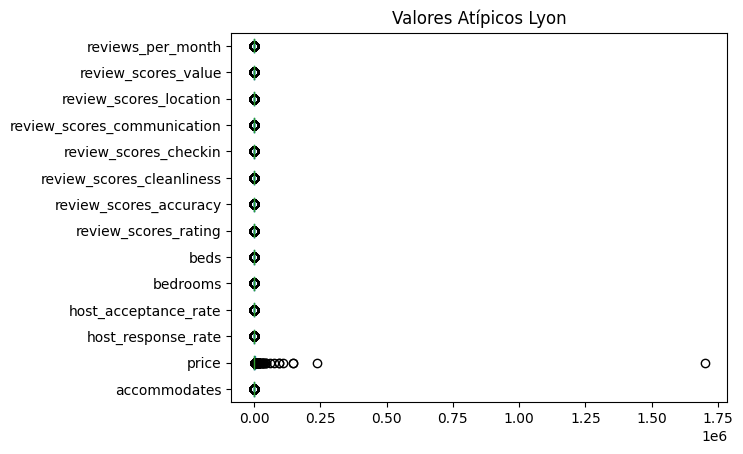

<Figure size 1500x800 with 0 Axes>

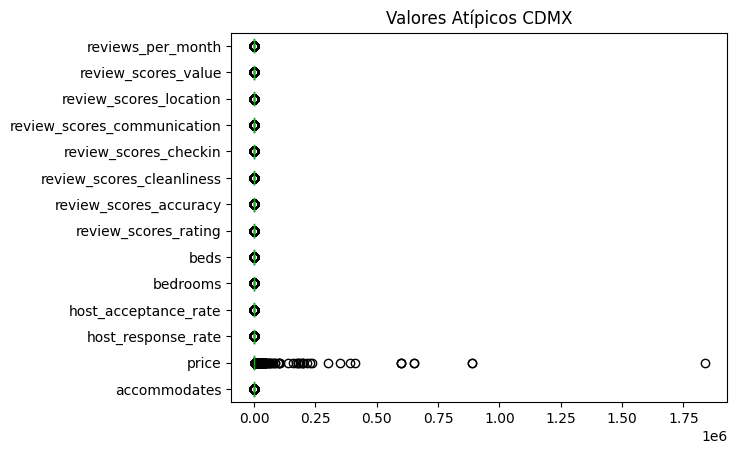

In [14]:
#Outliers float
#Utilizaremos el método de las cercas de Tukey
#Lyon
fig = plt.figure(figsize =(15, 8))
df1_float_limpio.plot(kind='box', vert=False)
plt.title("Valores Atípicos Lyon")
plt.show() 

#CDMX
fig = plt.figure(figsize =(15, 8))
df2_float_limpio.plot(kind='box', vert=False)
plt.title("Valores Atípicos CDMX")
plt.show() 

In [15]:
#Aplicamos el método
#Lyon
y=df1_float_limpio

percentile25=y.quantile(0.25) 
percentile75=y.quantile(0.75) 
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)



Limite superior permitido accommodates                      7.000
price                          3823.200
host_response_rate                1.150
host_acceptance_rate              1.250
bedrooms                          2.250
beds                              3.500
review_scores_rating              5.425
review_scores_accuracy            5.330
review_scores_cleanliness         5.425
review_scores_checkin             5.300
review_scores_communication       5.300
review_scores_location            5.330
review_scores_value               5.295
reviews_per_month                 3.155
dtype: float64
Limite inferior permitido accommodates                    -1.000
price                         -783.520
host_response_rate               0.750
host_acceptance_rate             0.530
bedrooms                         0.250
beds                            -0.500
review_scores_rating             4.105
review_scores_accuracy           4.450
review_scores_cleanliness        4.105
review_scores_checkin 

In [16]:
#Eliminamos los outliers
#Lyon
df1_float_limpio2= df1_float_limpio[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df1_float_limpio2

,accommodates,price,host_response_rate,host_acceptance_rate,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,6.0,2265.60,0.90,0.80,NaN,NaN,4.69,4.72,4.70,4.78,4.88,4.86,4.59,0.36
1,3.0,1416.00,1.00,0.89,2.0,2.0,4.65,4.65,4.55,4.95,4.95,4.90,4.45,0.20
2,4.0,1888.00,1.00,1.00,1.0,1.0,4.80,4.86,4.86,4.95,5.00,4.86,4.90,0.15
3,4.0,1699.20,NaN,NaN,1.0,1.0,4.48,4.62,4.27,4.75,4.64,4.86,4.44,0.89
4,2.0,830.72,1.00,0.74,1.5,1.0,4.80,4.86,4.78,4.93,4.95,4.90,4.78,2.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9882,6.0,2926.40,0.90,0.80,NaN,NaN,4.60,4.80,4.60,4.80,4.80,4.80,4.60,1.30
9883,2.0,1661.44,1.00,1.00,1.0,1.0,4.60,4.80,4.60,4.80,4.80,4.80,4.60,1.30
9884,4.0,2039.04,1.00,NaN,2.0,2.0,4.60,4.80,4.60,4.80,4.80,4.80,4.60,1.30
9885,2.0,1038.40,0.91,1.00,1.0,1.0,4.60,4.80,4.60,4.80,4.80,4.80,4.60,1.30


In [17]:
#Verificamos los nulos
#Lyon
df1_float_limpio2_nulos=df1_float_limpio2.isnull().sum()
df1_float_limpio2_nulos


accommodates                    226
price                           677
host_response_rate              377
host_acceptance_rate            867
bedrooms                        699
beds                            570
review_scores_rating            717
review_scores_accuracy          743
review_scores_cleanliness       864
review_scores_checkin           563
review_scores_communication     538
review_scores_location          679
review_scores_value             820
reviews_per_month              1040
dtype: int64

In [18]:
#Rellenamos los datos faltantes
#Lyon
df1_float_limpio3=df1_float_limpio2.copy()
df1_float_limpio3=df1_float_limpio2.fillna(round(df1_float_limpio2.mean(),1))
df1_float_limpio3
#verificamos los nulos
df1_float_limpio3_nulos=df1_float_limpio3.isnull().sum()
df1_float_limpio3_nulos

accommodates                   0
price                          0
host_response_rate             0
host_acceptance_rate           0
bedrooms                       0
beds                           0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64

In [19]:
#CDMX
y=df2_float_limpio

percentile25=y.quantile(0.25) 
percentile75=y.quantile(0.75) 
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido accommodates                      7.00000
price                          3161.50000
host_response_rate                1.09000
host_acceptance_rate              1.15000
bedrooms                          3.50000
beds                              3.50000
review_scores_rating              5.32500
review_scores_accuracy            5.26500
review_scores_cleanliness         5.35000
review_scores_checkin             5.30000
review_scores_communication       5.30000
review_scores_location            5.30000
review_scores_value               5.26500
reviews_per_month                 4.48125
dtype: float64
Limite inferior permitido accommodates                     -1.00000
price                         -1002.50000
host_response_rate                0.85000
host_acceptance_rate              0.75000
bedrooms                         -0.50000
beds                             -0.50000
review_scores_rating              4.32500
review_scores_accuracy            4.50500
review_sc

In [20]:
#CDMX
df2_float_limpio2= df2_float_limpio[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df2_float_limpio2

,accommodates,price,host_response_rate,host_acceptance_rate,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,3.0,1434.0,1.0,0.90,1.0,1.0,4.95,4.71,4.95,5.00,4.95,5.00,4.86,0.19
1,2.0,830.0,0.9,0.90,1.0,1.0,4.85,4.90,4.88,4.93,5.00,4.95,4.84,0.54
2,6.0,1469.0,1.0,0.90,3.0,3.0,4.57,4.82,4.71,4.92,4.92,4.58,4.71,0.31
3,2.0,NaN,0.9,0.90,1.0,1.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70
4,NaN,NaN,1.0,0.86,NaN,NaN,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,2.0,760.0,1.0,1.00,1.0,1.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70
24220,7.0,1520.0,0.9,0.90,2.0,3.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70
24221,2.0,533.0,0.9,0.96,2.0,1.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70
24222,2.0,1200.0,1.0,1.00,1.0,1.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70


In [21]:
#CDMX
df2_float_limpio2_nulos=df2_float_limpio2.isnull().sum()
df2_float_limpio2_nulos

accommodates                   1090
price                          1707
host_response_rate             1758
host_acceptance_rate           2224
bedrooms                        640
beds                           2347
review_scores_rating           1588
review_scores_accuracy         2150
review_scores_cleanliness      1510
review_scores_checkin          1226
review_scores_communication    1498
review_scores_location         1209
review_scores_value            1859
reviews_per_month              1373
dtype: int64

In [22]:
#CDMX
df2_float_limpio3=df2_float_limpio2.copy()
df2_float_limpio3=df2_float_limpio2.fillna(round(df2_float_limpio2.mean(),1))
df2_float_limpio3
#verificamos los nulos
df2_float_limpio3_nulos=df2_float_limpio3.isnull().sum()
df2_float_limpio3_nulos

accommodates                   0
price                          0
host_response_rate             0
host_acceptance_rate           0
bedrooms                       0
beds                           0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64

**UNIMOS LOS DATA FRAME Y TERMINAMOS CON LA PARTE DE LIMPIEZA**

In [23]:
#Lyon
lyon_limpio = pd.concat([df1_float_limpio3,df1_object_limpio], axis=1)
lyon_limpio.info()

#CDMX
cdmx_limpio = pd.concat([df2_float_limpio3,df2_object_limpio], axis=1)
cdmx_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9887 entries, 0 to 9886
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   accommodates                 9887 non-null   float64
 1   price                        9887 non-null   float64
 2   host_response_rate           9887 non-null   float64
 3   host_acceptance_rate         9887 non-null   float64
 4   bedrooms                     9887 non-null   float64
 5   beds                         9887 non-null   float64
 6   review_scores_rating         9887 non-null   float64
 7   review_scores_accuracy       9887 non-null   float64
 8   review_scores_cleanliness    9887 non-null   float64
 9   review_scores_checkin        9887 non-null   float64
 10  review_scores_communication  9887 non-null   float64
 11  review_scores_location       9887 non-null   float64
 12  review_scores_value          9887 non-null   float64
 13  reviews_per_month 

**ETAPA 2. ANÁLISIS DESCRIPTIVO**

Personas hospedadas en Lyon: 3.0408617376352787
Personas hospedadas en CDMX: 2.9427840158520477
El valor esperado de personas que buscan alojamiento por propiedad en Lyon es mayor, se espera hospedar a 0.09807772178323093 personas mas, en comparación a CDMX.


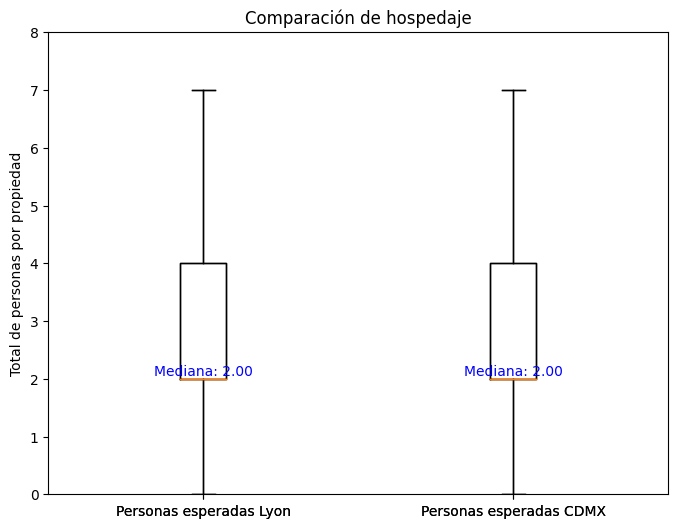

In [48]:
#Accomodate
accomodate_df1 = lyon_limpio['accommodates'].mean()
accomodate_df2 = cdmx_limpio['accommodates'].mean()
# Calcular la diferencia numérica entre las medias
diferencia = abs(accomodate_df1 - accomodate_df2)

print(f"Personas hospedadas en Lyon: {accomodate_df1}")
print(f"Personas hospedadas en CDMX: {accomodate_df2}")

if accomodate_df1 > accomodate_df2:
    print(f"El valor esperado de personas que buscan alojamiento por propiedad en Lyon es mayor, se espera hospedar a {diferencia} personas mas, en comparación a CDMX.")
elif accomodate_df1 < accomodate_df2:
    print(f"El valor esperado de personas que buscan alojamiento por propiedad en CDMX es mayor, se espera hospedar a {diferencia} personas mas, en comparación a Lyon.")
else:
    print("El valor esperado de las personas hospedadas por propiedad es igual.")

#Análisis visual
accomadate = [lyon_limpio["accommodates"], cdmx_limpio["accommodates"]]
labels = ['Personas esperadas Lyon', 'Personas esperadas CDMX']

plt.figure(figsize=(8, 6))

boxplot = plt.boxplot(accomadate, labels=labels, flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'red'})

# Agregar líneas o textos con los valores de mediana, mínimo y máximo si hay suficientes datos
medians = [item.get_ydata()[0] for item in boxplot['medians']]


for i in range(len(labels)):
    plt.text(i + 1, medians[i], f'Mediana: {medians[i]:.2f}', ha='center', va='bottom', color='blue')

plt.boxplot(accomadate, labels=labels)
plt.ylim(0,8)
plt.title('Comparación de hospedaje')
plt.ylabel('Total de personas por propiedad')
plt.show()

Precio promedio en Lyon: $1519.2740710023263
Precio promedio en CDMX: $1062.7248555151916
La media del precio por alojamiento en Lyon es mayor, se espera gastar $456.5492154871347 mas por noche en comparación a CDMX.


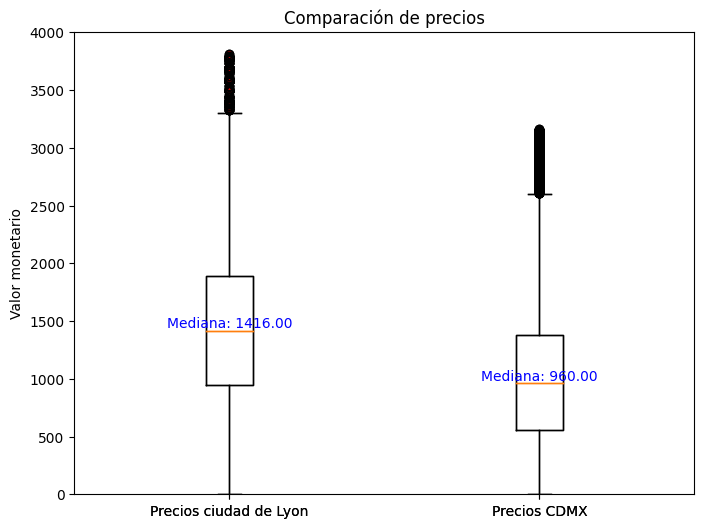

In [49]:
#Precio
precio_df1 = lyon_limpio['price'].mean()
precio_df2 = cdmx_limpio['price'].mean()
# Calcular la diferencia numérica entre las medias
diferencia = abs(precio_df1 - precio_df2)

print(f"Precio promedio en Lyon: ${precio_df1}")
print(f"Precio promedio en CDMX: ${precio_df2}")

if precio_df1 > precio_df2:
    print(f"La media del precio por alojamiento en Lyon es mayor, se espera gastar ${diferencia} mas por noche en comparación a CDMX.")
elif precio_df1 < precio_df2:
    print(f"La media del precio por alojamiento en CDMX es mayor, se espera gastar ${diferencia} mas por noche en comparación a Lyon.")
else:
    print("El promedio del precio por alojamiento es el mismo.")

#Análisis visual
price = [lyon_limpio["price"], cdmx_limpio["price"]]
labels = ['Precios ciudad de Lyon', 'Precios CDMX']

plt.figure(figsize=(8, 6))

boxplot = plt.boxplot(price, labels=labels, flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'red'})

# Agregar líneas o textos con los valores de mediana, mínimo y máximo si hay suficientes datos
medians = [item.get_ydata()[0] for item in boxplot['medians']]


for i in range(len(labels)):
    plt.text(i + 1, medians[i], f'Mediana: {medians[i]:.2f}', ha='center', va='bottom', color='blue')

plt.boxplot(price, labels=labels)
plt.ylim(0,4000)
plt.title('Comparación de precios')
plt.ylabel('Valor monetario')
plt.show()


Tasa promedio de respuesta del anfitrión en Lyon: 93.85364620208357 %
Tasa promedio de respuesta del anfitrión en CDMX: 98.03764861294584 %
La tasa promedio de respuesta de los anfitriones en CDMX es de 4.184002410862275% mas, en comparación a Lyon.


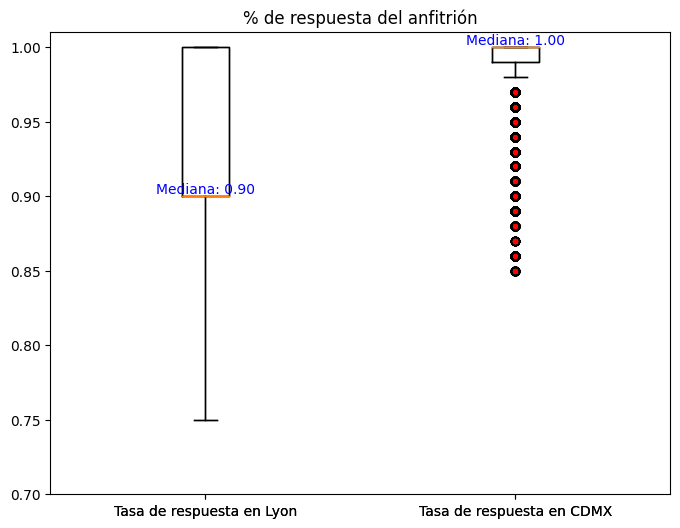

In [50]:
#host response rate
response_df1 = lyon_limpio['host_response_rate'].mean()
response_df2 = cdmx_limpio['host_response_rate'].mean()
# Calcular la diferencia numérica entre las medias
diferencia = 100*(abs(response_df1 - response_df2))

print(f"Tasa promedio de respuesta del anfitrión en Lyon: {response_df1*100} %")
print(f"Tasa promedio de respuesta del anfitrión en CDMX: {response_df2*100} %")

if response_df1 > response_df2:
    print(f"La tasa promedio de respuesta de los anfitriones en Lyon es de {diferencia}% mas, en comparación a CDMX.")
elif response_df1 < response_df2:
    print(f"La tasa promedio de respuesta de los anfitriones en CDMX es de {diferencia}% mas, en comparación a Lyon.")
else:
    print("La tasa promedio de respuesta es similar en ambas ciudades.")

#Análisis visual
response = [lyon_limpio["host_response_rate"], cdmx_limpio["host_response_rate"]]
labels = ['Tasa de respuesta en Lyon', 'Tasa de respuesta en CDMX']

plt.figure(figsize=(8, 6))

boxplot = plt.boxplot(response, labels=labels, flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'red'})

# Agregar líneas o textos con los valores de mediana, mínimo y máximo si hay suficientes datos
medians = [item.get_ydata()[0] for item in boxplot['medians']]


for i in range(len(labels)):
    plt.text(i + 1, medians[i], f'Mediana: {medians[i]:.2f}', ha='center', va='bottom', color='blue')

plt.boxplot(response, labels=labels)
plt.ylim(0.7,1.01)
plt.title('% de respuesta del anfitrión')
plt.ylabel('')
plt.show()

Tasa promedio de aceptación del anfitrión en Lyon: 86.3343784767877 %
Tasa promedio de aceptación del anfitrión en CDMX: 97.09275924702774 %
La tasa promedio de aceptación de los anfitriones en CDMX es de 10.758380770240027% mas, en comparación a Lyon.


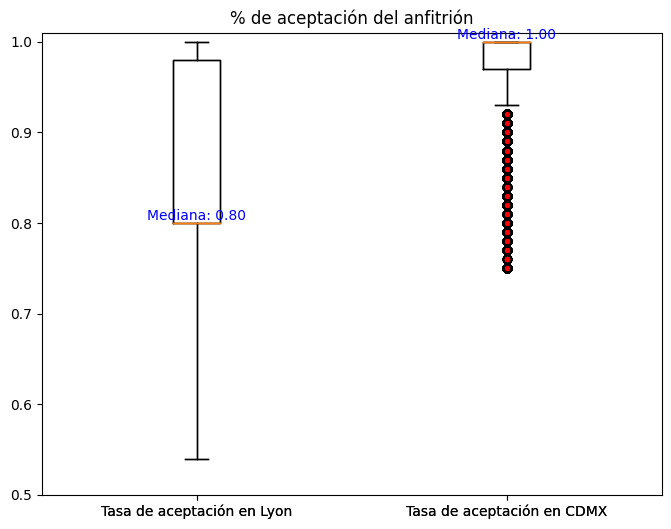

In [51]:
#host acceptance rate
acceptance_df1 = lyon_limpio['host_acceptance_rate'].mean()
acceptance_df2 = cdmx_limpio['host_acceptance_rate'].mean()
# Calcular la diferencia numérica entre las medias
diferencia = 100*(abs(acceptance_df1 - acceptance_df2))

print(f"Tasa promedio de aceptación del anfitrión en Lyon: {acceptance_df1*100} %")
print(f"Tasa promedio de aceptación del anfitrión en CDMX: {acceptance_df2*100} %")

if acceptance_df1 > acceptance_df2:
    print(f"La tasa promedio de aceptación de los anfitriones en Lyon es de {diferencia}% mas, en comparación a CDMX.")
elif acceptance_df1 < acceptance_df2:
    print(f"La tasa promedio de aceptación de los anfitriones en CDMX es de {diferencia}% mas, en comparación a Lyon.")
else:
    print("La tasa promedio de aceptación es similar en ambas ciudades.")

#Análisis visual
acceptance = [lyon_limpio["host_acceptance_rate"], cdmx_limpio["host_acceptance_rate"]]
labels = ['Tasa de aceptación en Lyon', 'Tasa de aceptación en CDMX']

plt.figure(figsize=(8, 6))

boxplot = plt.boxplot(acceptance, labels=labels, flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'red'})

# Agregar líneas o textos con los valores de mediana, mínimo y máximo si hay suficientes datos
medians = [item.get_ydata()[0] for item in boxplot['medians']]


for i in range(len(labels)):
    plt.text(i + 1, medians[i], f'Mediana: {medians[i]:.2f}', ha='center', va='bottom', color='blue')

plt.boxplot(acceptance, labels=labels)
plt.ylim(0.5,1.01)
plt.title('% de aceptación del anfitrión')
plt.ylabel('')
plt.show()

Promedio de habitaciones por propiedad en Lyon es de: 1.3660968949125112
Promedio de habitaciones por propiedad en CDMX es de: 1.4438160501981505
El promedio de habitaciones por propiedad en CDMX es mayor, se espera contar con 0.07771915528563933 habitaciones mas, en comparación a Lyon.


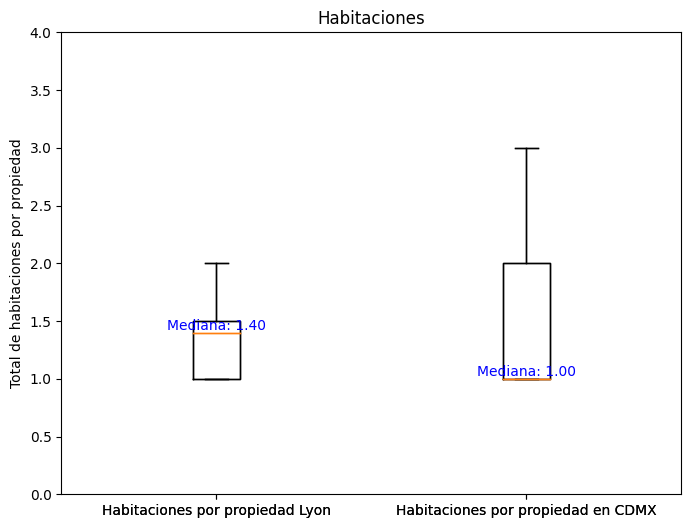

In [52]:
#bedrooms
bedrooms_df1 = lyon_limpio['bedrooms'].mean()
bedrooms_df2 = cdmx_limpio['bedrooms'].mean()
# Calcular la diferencia numérica entre las medias
diferencia = abs(bedrooms_df1 - bedrooms_df2)

print(f"Promedio de habitaciones por propiedad en Lyon es de: {bedrooms_df1}")
print(f"Promedio de habitaciones por propiedad en CDMX es de: {bedrooms_df2}")

if bedrooms_df1 > bedrooms_df2:
    print(f"El promedio de habitaciones por propiedad en Lyon es mayor, se espera contar con {diferencia} habitaciones mas, en comparación a CDMX.")
elif bedrooms_df1 < bedrooms_df2:
    print(f"El promedio de habitaciones por propiedad en CDMX es mayor, se espera contar con {diferencia} habitaciones mas, en comparación a Lyon.")
else:
    print("El promedio de habitaciones por propiedad es igual para ambas ciudades.")

#Análisis visual
bedrooms = [lyon_limpio["bedrooms"], cdmx_limpio["bedrooms"]]
labels = ['Habitaciones por propiedad Lyon', 'Habitaciones por propiedad en CDMX']

plt.figure(figsize=(8, 6))

boxplot = plt.boxplot(bedrooms, labels=labels, flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'red'})

# Agregar líneas o textos con los valores de mediana, mínimo y máximo si hay suficientes datos
medians = [item.get_ydata()[0] for item in boxplot['medians']]


for i in range(len(labels)):
    plt.text(i + 1, medians[i], f'Mediana: {medians[i]:.2f}', ha='center', va='bottom', color='blue')

plt.boxplot(bedrooms, labels=labels)
plt.ylim(0,4)
plt.title('Habitaciones')
plt.ylabel('Total de habitaciones por propiedad')
plt.show()

El número de camas esperadas por propiedad en Lyon es de: 1.5469808839890766
El número de camas esperadas por propiedad en CDMX es de: 1.590373183619551
El promedio de camas por propiedad en CDMX es mayor, se espera contar con 0.04339229963047431 camas mas, en comparación a Lyon.


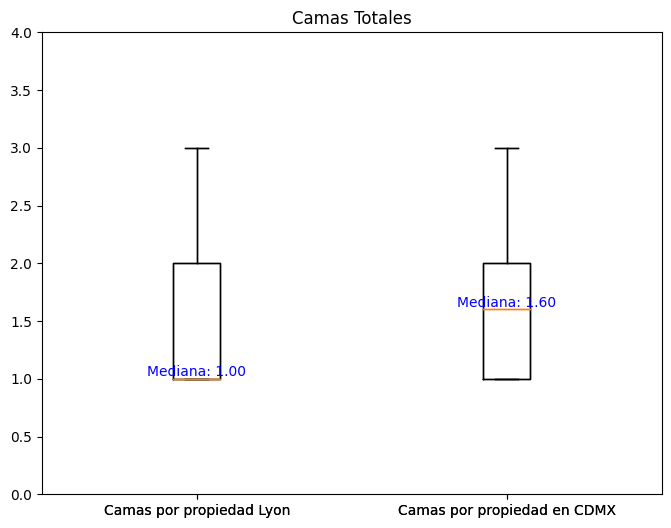

In [53]:
#beds
beds_df1 = lyon_limpio['beds'].mean()
beds_df2 = cdmx_limpio['beds'].mean()
# Calcular la diferencia numérica entre las medias
diferencia = abs(beds_df1 - beds_df2)

print(f"El número de camas esperadas por propiedad en Lyon es de: {beds_df1}")
print(f"El número de camas esperadas por propiedad en CDMX es de: {beds_df2}")

if beds_df1 > beds_df2:
    print(f"El promedio de camas por propiedad en Lyon es mayor, se espera contar con {diferencia} camas mas, en comparación a CDMX.")
elif beds_df1 < beds_df2:
    print(f"El promedio de camas por propiedad en CDMX es mayor, se espera contar con {diferencia} camas mas, en comparación a Lyon.")
else:
    print("El promedio de camas por propiedad es igual para ambas ciudades.")

#Análisis visual
beds = [lyon_limpio["beds"], cdmx_limpio["beds"]]
labels = ['Camas por propiedad Lyon', 'Camas por propiedad en CDMX']

plt.figure(figsize=(8, 6))

boxplot = plt.boxplot(beds, labels=labels, flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'red'})

# Agregar líneas o textos con los valores de mediana, mínimo y máximo si hay suficientes datos
medians = [item.get_ydata()[0] for item in boxplot['medians']]


for i in range(len(labels)):
    plt.text(i + 1, medians[i], f'Mediana: {medians[i]:.2f}', ha='center', va='bottom', color='blue')

plt.boxplot(beds, labels=labels)
plt.ylim(0,4)
plt.title('Camas Totales')
plt.ylabel('')
plt.show()

**Interacción dircta de los usuarios**

El valor promedio de rating por propiedad en Lyon es de: 4.739869525639729
El valor promedio de rating por propiedad en CDMX es de: 4.806752807133421
El valor promedio de rating por propiedad en CDMX es mayor, se espera contar con 0.06688328149369216 puntos mas, en comparación a Lyon.


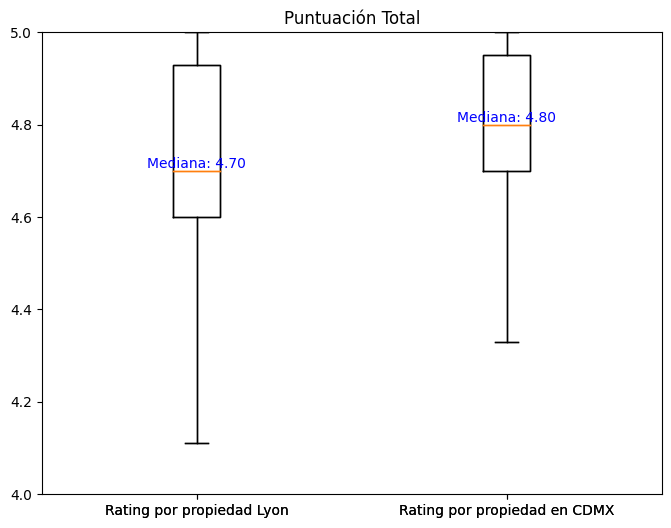

In [54]:
#rating
rating_df1 = lyon_limpio['review_scores_rating'].mean()
rating_df2 = cdmx_limpio['review_scores_rating'].mean()
# Calcular la diferencia numérica entre las medias
diferencia = abs(rating_df1 - rating_df2)

print(f"El valor promedio de rating por propiedad en Lyon es de: {rating_df1}")
print(f"El valor promedio de rating por propiedad en CDMX es de: {rating_df2}")

if rating_df1 > rating_df2:
    print(f"El valor promedio de rating por propiedad en Lyon es mayor, se espera contar con {diferencia} puntos mas, en comparación a CDMX.")
elif rating_df1 < rating_df2:
    print(f"El valor promedio de rating por propiedad en CDMX es mayor, se espera contar con {diferencia} puntos mas, en comparación a Lyon.")
else:
    print("El valor promedio de rating por propiedad es igual para ambas ciudades.")

#Análisis visual
rating = [lyon_limpio["review_scores_rating"], cdmx_limpio["review_scores_rating"]]
labels = ['Rating por propiedad Lyon', 'Rating por propiedad en CDMX']

plt.figure(figsize=(8, 6))


boxplot = plt.boxplot(rating, labels=labels, flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'red'})

# Agregar líneas o textos con los valores de mediana, mínimo y máximo si hay suficientes datos
medians = [item.get_ydata()[0] for item in boxplot['medians']]


for i in range(len(labels)):
    plt.text(i + 1, medians[i], f'Mediana: {medians[i]:.2f}', ha='center', va='bottom', color='blue')

plt.boxplot(rating, labels=labels)
plt.ylim(4,5)
plt.title('Puntuación Total')
plt.ylabel('')
plt.show()

El valor promedio de precisión en Lyon es de: 4.86
El valor promedio de precisión en CDMX es de: 4.87
El valor promedio de precisión en CDMX es mayor, se espera contar con 0.02 puntos más, en comparación a Lyon.


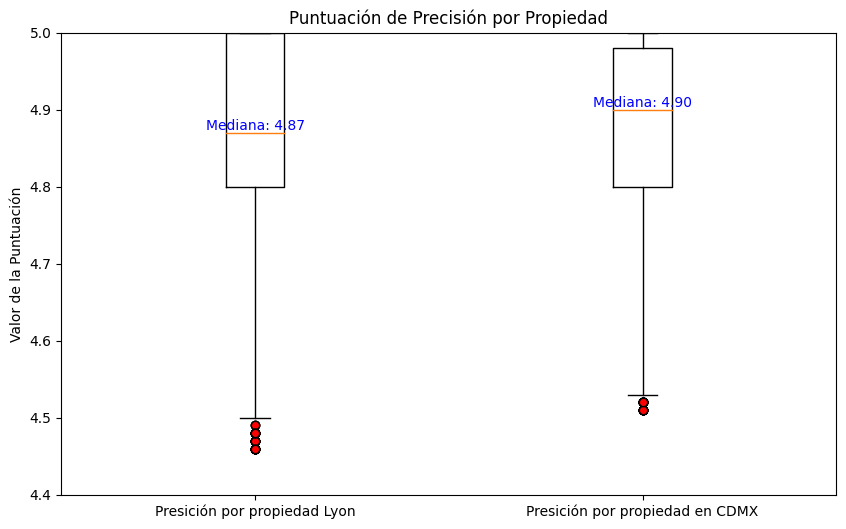

In [58]:
#accuracy
accuracy_df1 = lyon_limpio['review_scores_accuracy'].mean()
accuracy_df2 = cdmx_limpio['review_scores_accuracy'].mean()

# Calcular la diferencia numérica entre las medias
diferencia = abs(accuracy_df1 - accuracy_df2)

print(f"El valor promedio de precisión en Lyon es de: {accuracy_df1:.2f}")
print(f"El valor promedio de precisión en CDMX es de: {accuracy_df2:.2f}")

if accuracy_df1 > accuracy_df2:
    print(f"El valor promedio de precisión en Lyon es mayor, se espera contar con {diferencia:.2f} puntos más, en comparación a CDMX.")
elif accuracy_df1 < accuracy_df2:
    print(f"El valor promedio de precisión en CDMX es mayor, se espera contar con {diferencia:.2f} puntos más, en comparación a Lyon.")
else:
    print("El valor promedio de precisión es igual para ambas ciudades.")

# Análisis visual
accuracy = [lyon_limpio["review_scores_accuracy"], cdmx_limpio["review_scores_accuracy"]]
labels = ['Presición por propiedad Lyon', 'Presición por propiedad en CDMX']

plt.figure(figsize=(10, 6))

boxplot = plt.boxplot(accuracy, labels=labels, flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'red'})

# Agregar líneas o textos con los valores de mediana, mínimo y máximo si hay suficientes datos
medians = [item.get_ydata()[0] for item in boxplot['medians']]


for i in range(len(labels)):
    plt.text(i + 1, medians[i], f'Mediana: {medians[i]:.2f}', ha='center', va='bottom', color='blue')

plt.ylim(4.4, 5)  # Ajusta el rango del eje y según tus datos
plt.title('Puntuación de Precisión por Propiedad')
plt.ylabel('Valor de la Puntuación')
plt.show()


El valor promedio de higiene en Lyon es de: 4.73
El valor promedio de higiene en CDMX es de: 4.82
El valor promedio de higiene en CDMX es mayor, se espera contar con 0.09 puntos más, en comparación a Lyon.


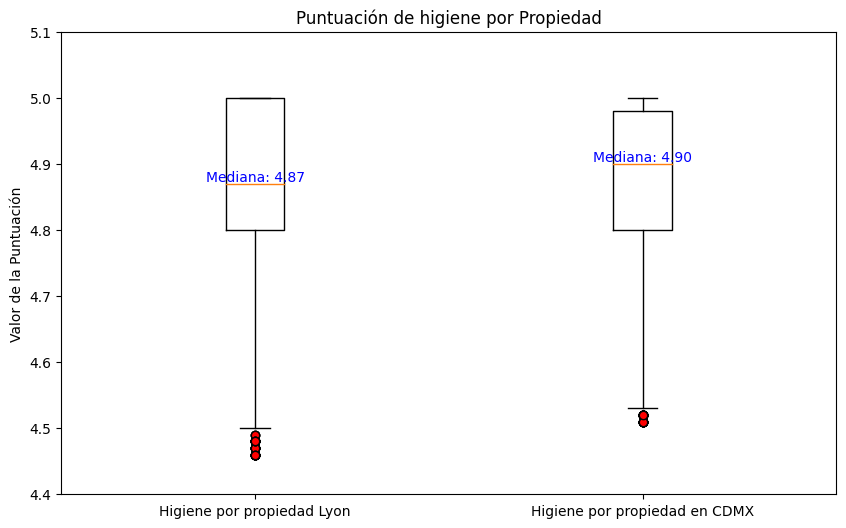

In [56]:
#cleanliness
cleanliness_df1 = lyon_limpio['review_scores_cleanliness'].mean()
cleanliness_df2 = cdmx_limpio['review_scores_cleanliness'].mean()

# Calcular la diferencia numérica entre las medias
diferencia = abs(cleanliness_df1 - cleanliness_df2)

print(f"El valor promedio de higiene en Lyon es de: {cleanliness_df1:.2f}")
print(f"El valor promedio de higiene en CDMX es de: {cleanliness_df2:.2f}")

if cleanliness_df1 > cleanliness_df2:
    print(f"El valor promedio de higiene en Lyon es mayor, se espera contar con {diferencia:.2f} puntos más, en comparación a CDMX.")
elif cleanliness_df1 < cleanliness_df2:
    print(f"El valor promedio de higiene en CDMX es mayor, se espera contar con {diferencia:.2f} puntos más, en comparación a Lyon.")
else:
    print("El valor promedio de higiene es igual para ambas ciudades.")

# Análisis visual
cleanliness = [lyon_limpio["review_scores_accuracy"], cdmx_limpio["review_scores_accuracy"]]
labels = ['Higiene por propiedad Lyon', 'Higiene por propiedad en CDMX']

plt.figure(figsize=(10, 6))

boxplot = plt.boxplot(cleanliness, labels=labels, flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'red'})

# Agregar líneas o textos con los valores de mediana, mínimo y máximo si hay suficientes datos
medians = [item.get_ydata()[0] for item in boxplot['medians']]


for i in range(len(labels)):
    plt.text(i + 1, medians[i], f'Mediana: {medians[i]:.2f}', ha='center', va='bottom', color='blue')

plt.ylim(4.4, 5.1)  # Ajusta el rango del eje y según tus datos
plt.title('Puntuación de higiene por Propiedad')
plt.ylabel('Valor de la Puntuación')
plt.show()

La puntuación promedio de checkin en Lyon es de: 4.87
La puntuación promedio de checkin en CDMX es de: 4.89
La puntuación promedio de checkin en CDMX es mayor, se espera contar con 0.02 puntos más, en comparación a Lyon.


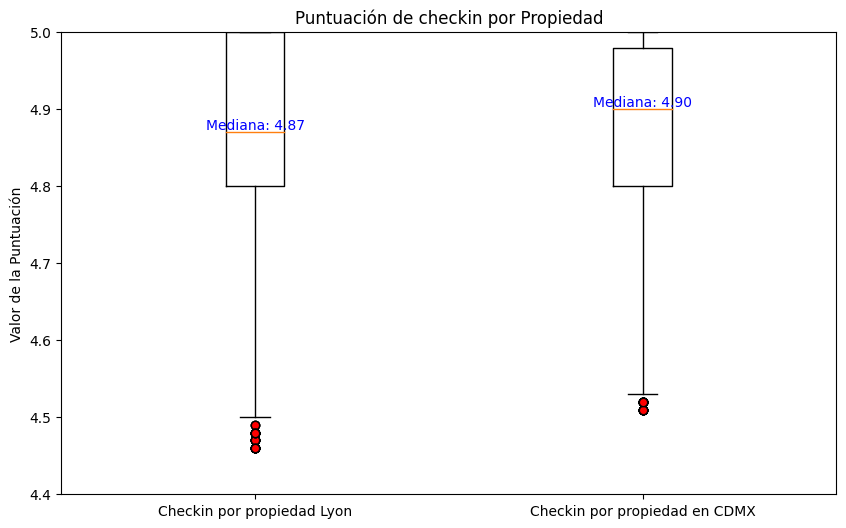

In [59]:
#checkin
checkin_df1 = lyon_limpio['review_scores_checkin'].mean()
checkin_df2 = cdmx_limpio['review_scores_checkin'].mean()

# Calcular la diferencia numérica entre las medias
diferencia = abs(checkin_df1 - checkin_df2)

print(f"La puntuación promedio de checkin en Lyon es de: {checkin_df1:.2f}")
print(f"La puntuación promedio de checkin en CDMX es de: {checkin_df2:.2f}")

if checkin_df1 > checkin_df2:
    print(f"La puntuación promedio de checkin en Lyon es mayor, se espera contar con {diferencia:.2f} puntos más, en comparación a CDMX.")
elif checkin_df1 < checkin_df2:
    print(f"La puntuación promedio de checkin en CDMX es mayor, se espera contar con {diferencia:.2f} puntos más, en comparación a Lyon.")
else:
    print("La puntuación promedio de checkin es igual para ambas ciudades.")

# Análisis visual
checkin = [lyon_limpio["review_scores_checkin"], cdmx_limpio["review_scores_checkin"]]
labels = ['Checkin por propiedad Lyon', 'Checkin por propiedad en CDMX']

plt.figure(figsize=(10, 6))

boxplot = plt.boxplot(cleanliness, labels=labels, flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'red'})

# Agregar líneas o textos con los valores de mediana, mínimo y máximo si hay suficientes datos
medians = [item.get_ydata()[0] for item in boxplot['medians']]


for i in range(len(labels)):
    plt.text(i + 1, medians[i], f'Mediana: {medians[i]:.2f}', ha='center', va='bottom', color='blue')

plt.ylim(4.4, 5)  # Ajusta el rango del eje y según tus datos
plt.title('Puntuación de checkin por Propiedad')
plt.ylabel('Valor de la Puntuación')
plt.show()

La puntuación promedio de comunicación con anfitrión en Lyon es de: 4.88
La puntuación promedio de comunicación con anfitrión en CDMX es de: 4.89
La puntuación promedio de comunicación con anfitrión en CDMX es mayor, se espera contar con 0.01 puntos más, en comparación a Lyon.


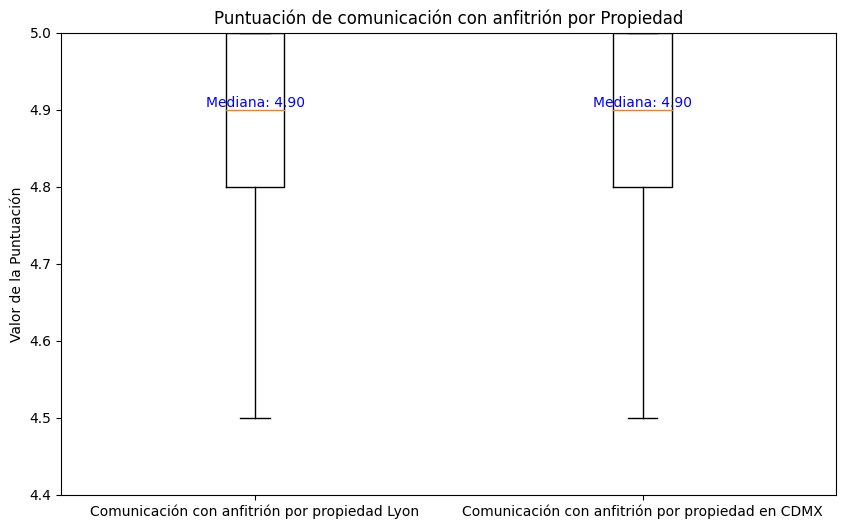

In [61]:
#communication
communication_df1 = lyon_limpio['review_scores_communication'].mean()
communication_df2 = cdmx_limpio['review_scores_communication'].mean()

# Calcular la diferencia numérica entre las medias
diferencia = abs(communication_df1 - communication_df2)

print(f"La puntuación promedio de comunicación con anfitrión en Lyon es de: {communication_df1:.2f}")
print(f"La puntuación promedio de comunicación con anfitrión en CDMX es de: {communication_df2:.2f}")

if communication_df1 > communication_df2:
    print(f"La puntuación promedio de comunicación con anfitrión en Lyon es mayor, se espera contar con {diferencia:.2f} puntos más, en comparación a CDMX.")
elif communication_df1 < communication_df2:
    print(f"La puntuación promedio de comunicación con anfitrión en CDMX es mayor, se espera contar con {diferencia:.2f} puntos más, en comparación a Lyon.")
else:
    print("La puntuación promedio de comunicación con anfitrión es igual para ambas ciudades.")

# Análisis visual
communication = [lyon_limpio["review_scores_communication"], cdmx_limpio["review_scores_communication"]]
labels = ['Comunicación con anfitrión por propiedad Lyon', 'Comunicación con anfitrión por propiedad en CDMX']

plt.figure(figsize=(10, 6))

boxplot = plt.boxplot(communication, labels=labels, flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'red'})

# Agregar líneas o textos con los valores de mediana, mínimo y máximo si hay suficientes datos
medians = [item.get_ydata()[0] for item in boxplot['medians']]


for i in range(len(labels)):
    plt.text(i + 1, medians[i], f'Mediana: {medians[i]:.2f}', ha='center', va='bottom', color='blue')

plt.ylim(4.4, 5)  # Ajusta el rango del eje y según tus datos
plt.title('Puntuación de comunicación con anfitrión por Propiedad')
plt.ylabel('Valor de la Puntuación')
plt.show()

La puntuación promedio de locación en Lyon es de: 4.83
La puntuación promedio de locación con anfitrión en CDMX es de: 4.89
La puntuación promedio de locación  en CDMX es mayor, se espera contar con 0.06 puntos más, en comparación a Lyon.


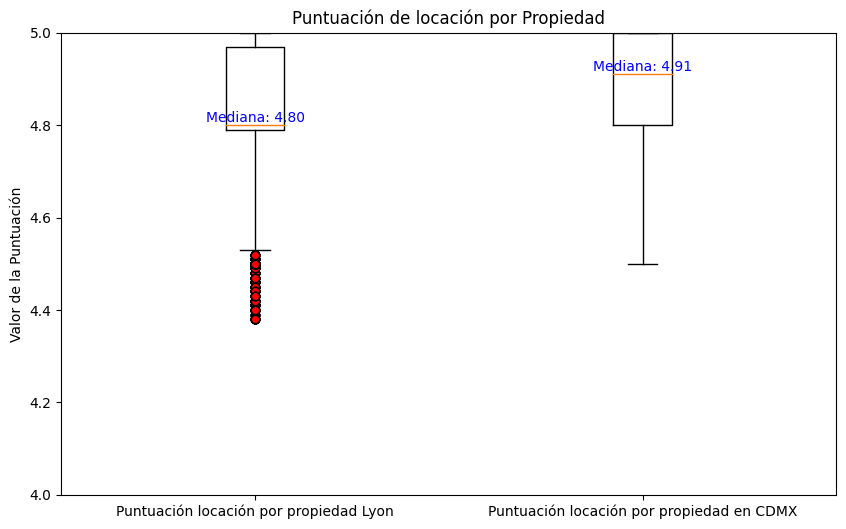

In [65]:
#location
location_df1 = lyon_limpio['review_scores_location'].mean()
location_df2 = cdmx_limpio['review_scores_location'].mean()

# Calcular la diferencia numérica entre las medias
diferencia = abs(location_df1 - location_df2)

print(f"La puntuación promedio de locación en Lyon es de: {location_df1:.2f}")
print(f"La puntuación promedio de locación con anfitrión en CDMX es de: {location_df2:.2f}")

if location_df1 > location_df2:
    print(f"La puntuación promedio de locación  en Lyon es mayor, se espera contar con {diferencia:.2f} puntos más, en comparación a CDMX.")
elif location_df1 < location_df2:
    print(f"La puntuación promedio de locación  en CDMX es mayor, se espera contar con {diferencia:.2f} puntos más, en comparación a Lyon.")
else:
    print("La puntuación promedio de locación es igual para ambas ciudades.")

# Análisis visual
location = [lyon_limpio["review_scores_location"], cdmx_limpio["review_scores_location"]]
labels = ['Puntuación locación por propiedad Lyon', 'Puntuación locación por propiedad en CDMX']

plt.figure(figsize=(10, 6))

boxplot = plt.boxplot(location, labels=labels, flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'red'})

# Agregar líneas o textos con los valores de mediana, mínimo y máximo si hay suficientes datos
medians = [item.get_ydata()[0] for item in boxplot['medians']]


for i in range(len(labels)):
    plt.text(i + 1, medians[i], f'Mediana: {medians[i]:.2f}', ha='center', va='bottom', color='blue')

plt.ylim(4, 5)  # Ajusta el rango del eje y según tus datos
plt.title('Puntuación de locación por Propiedad')
plt.ylabel('Valor de la Puntuación')
plt.show()